In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.patches import Patch

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

## Clustering Evaluation Function

In [73]:
def evaluate_clustering(X, labels, n_cluster, ax = None, title_suffix = ''):

    """
    Evaluate a clustering model based on silhoutte scores and the Davies-Bouldin index

    parameters:
    X(ndarray): Feature Matrix
    labels (array_like): Cluster labels assigned to each sample
    n_clusters(int): the number of clusters in the model
    ax: The subplot axes to plot on
    title_suffix (str): Optional suffix for plot titlec

    Returns:
    silhoutte score: Predicts how does the model perform (ranges -1 to 1)
    1--> model has done excellent
    0--> model did a moderate performance
    -1--> model has done the worst
    """

    if ax is None:
        ax = plt.gca() # Get the current axis if none is provided

    # Calculate silhoutte score:
    silhouette_avg =silhouette_score(X,labels)
    sample_silhouette_values = silhouette_samples(X, labels)


    # plot silhouette analysis on the provided axis
    unique_labels = np.unique(labels)
    colormap =cm.tab10

    color_dict = {label:colormap(float(label)/n_clusters) for label in unique_labels}
    y_lower = 10

    for i in unique_labels:
        ith_cluster_silhouette_values = sample_silhouette_values[labels ==i]
        ith_cluster_silhouette_values.sort()

        print(f"ith cluster silhouette values shape: {ith_cluster_silhouette_values.shape}")
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        y_upper = y_lower + size_cluster_i


        color = color_dict[i]

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor = color, edgecolor = color, alpha = 0.7)

        ax.text(-0.05, y_lower+0.5 * size_cluster_i, str(i))
        y_lower = y_upper+10

    ax.set_title(f'Silhouette Score for {title_suffix} \n' + 
                 f'Average Silhouette: {silhouette_avg:.2f}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlim([-0.25, 1])  # Set the x-axis range to [0, 1]

    ax.set_yticks([])

        
    

In [74]:
"""
def evaluate_clustering(X,labels, n_cluster, ax = None ):

    
    


    # avg silhoutte score
    if ax is None:
        ax = plt.gca()
    silhouette_avg = silhouette_score(X, labels)
    silhouette_score = silhouette_samples(X, labels)

    unique_labels = np.unique(labels)

    color = cm.tab10
    color_dict = {label: color(float(label)/n_cluster) for label in unique_labels}
    y_lower = 10

    # now for each unique label in the clusters, we would assign them a different color, and plot them.
    for i in unique_labels:

        # get their silhouette score and sort them
        y_lower = 10

        ith_silhouette_score = silhouette_score(labels ==i)
        ith_silhouette_score.sort()

        # now assign a color to the cluster
        color_code = color[i]

        cluster_size = ith_silhouette_score.shape[0]
        y_upper = y_lower + cluster_size
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_silhouette_score,
                        facecolor = color_code,edgecolor = color_code,
                        alpha = 0.7)

        ax.text(-0.05,y_lower + 0.5*cluster_size,str(i))
        y_lower = y_upper+10

        
"""

'\ndef evaluate_clustering(X,labels, n_cluster, ax = None ):\n\n    \n    \n\n\n    # avg silhoutte score\n    if ax is None:\n        ax = plt.gca()\n    silhouette_avg = silhouette_score(X, labels)\n    silhouette_score = silhouette_samples(X, labels)\n\n    unique_labels = np.unique(labels)\n\n    color = cm.tab10\n    color_dict = {label: color(float(label)/n_cluster) for label in unique_labels}\n    y_lower = 10\n\n    # now for each unique label in the clusters, we would assign them a different color, and plot them.\n    for i in unique_labels:\n\n        # get their silhouette score and sort them\n        y_lower = 10\n\n        ith_silhouette_score = silhouette_score(labels ==i)\n        ith_silhouette_score.sort()\n\n        # now assign a color to the cluster\n        color_code = color[i]\n\n        cluster_size = ith_silhouette_score.shape[0]\n        y_upper = y_lower + cluster_size\n        ax.fill_betweenx(np.arange(y_lower, y_upper),\n                        0, ith_silh

## Clustering Synthetic Data with four blobs to experiment with k-means clustering

ith cluster silhouette values shape: (126,)
ith cluster silhouette values shape: (132,)
ith cluster silhouette values shape: (104,)
ith cluster silhouette values shape: (138,)


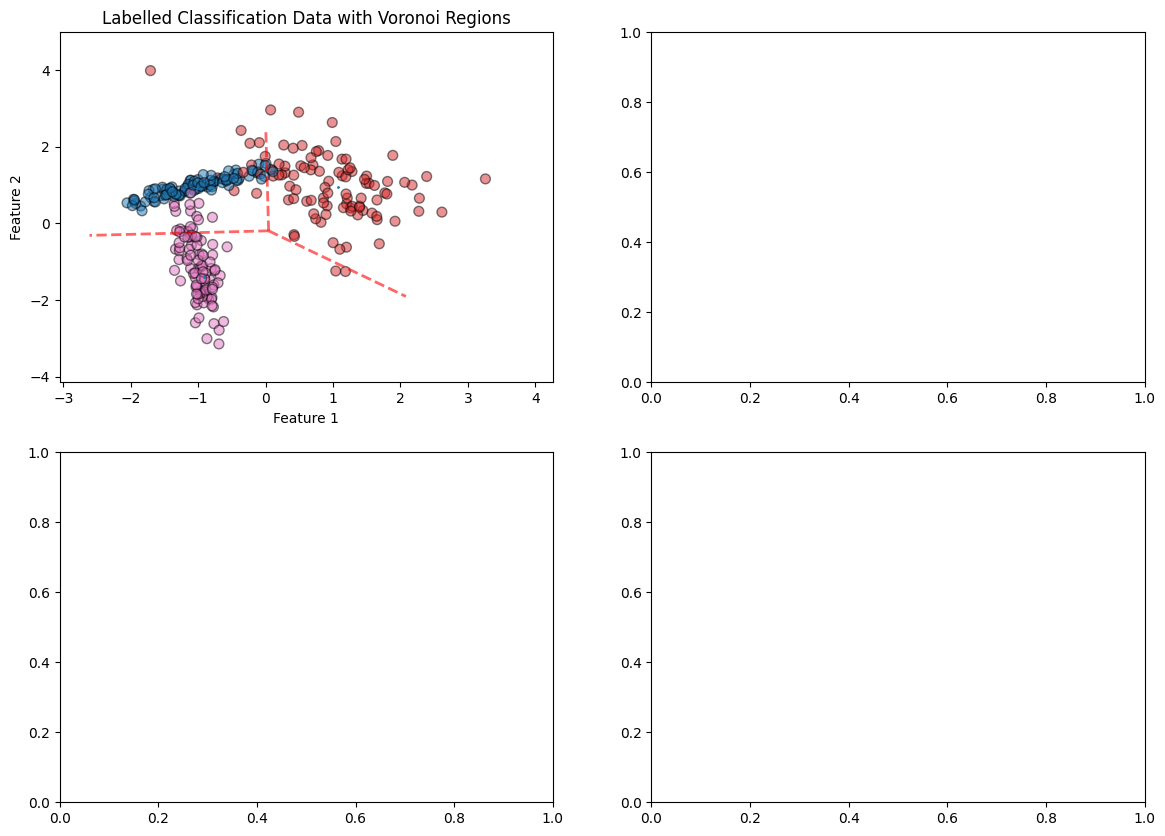

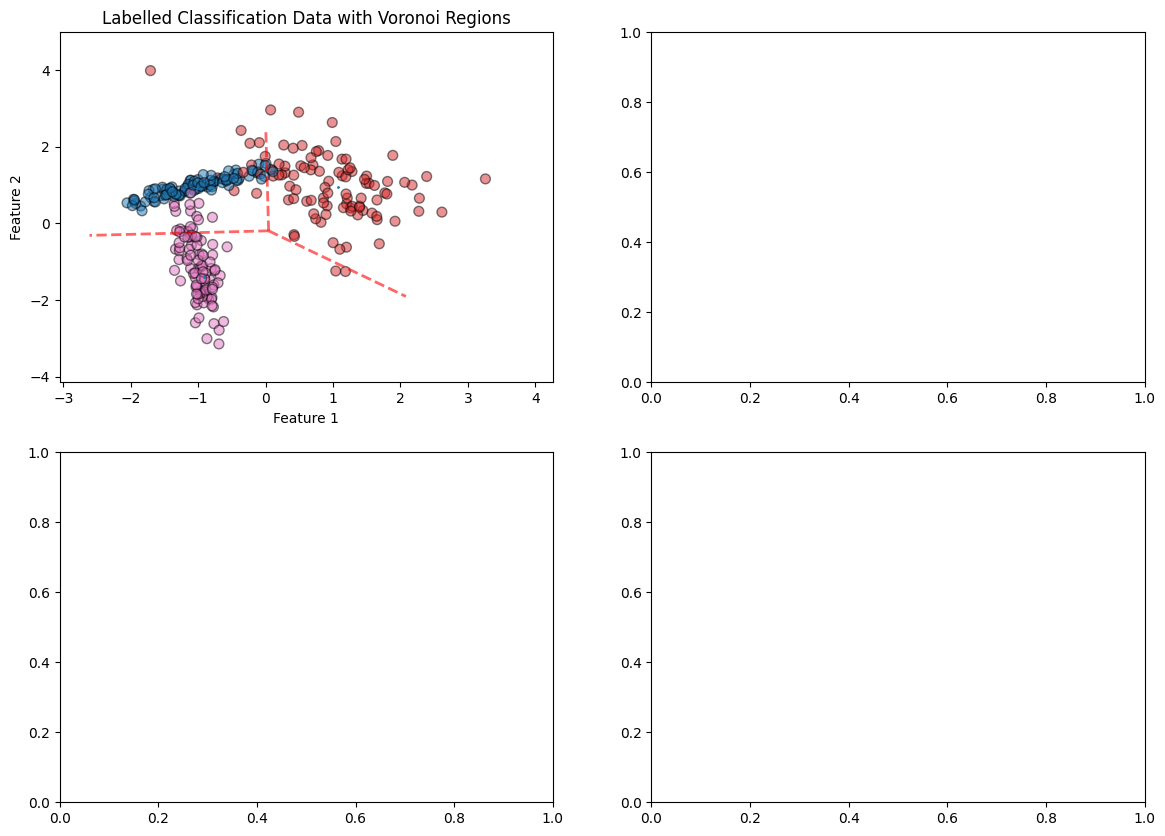

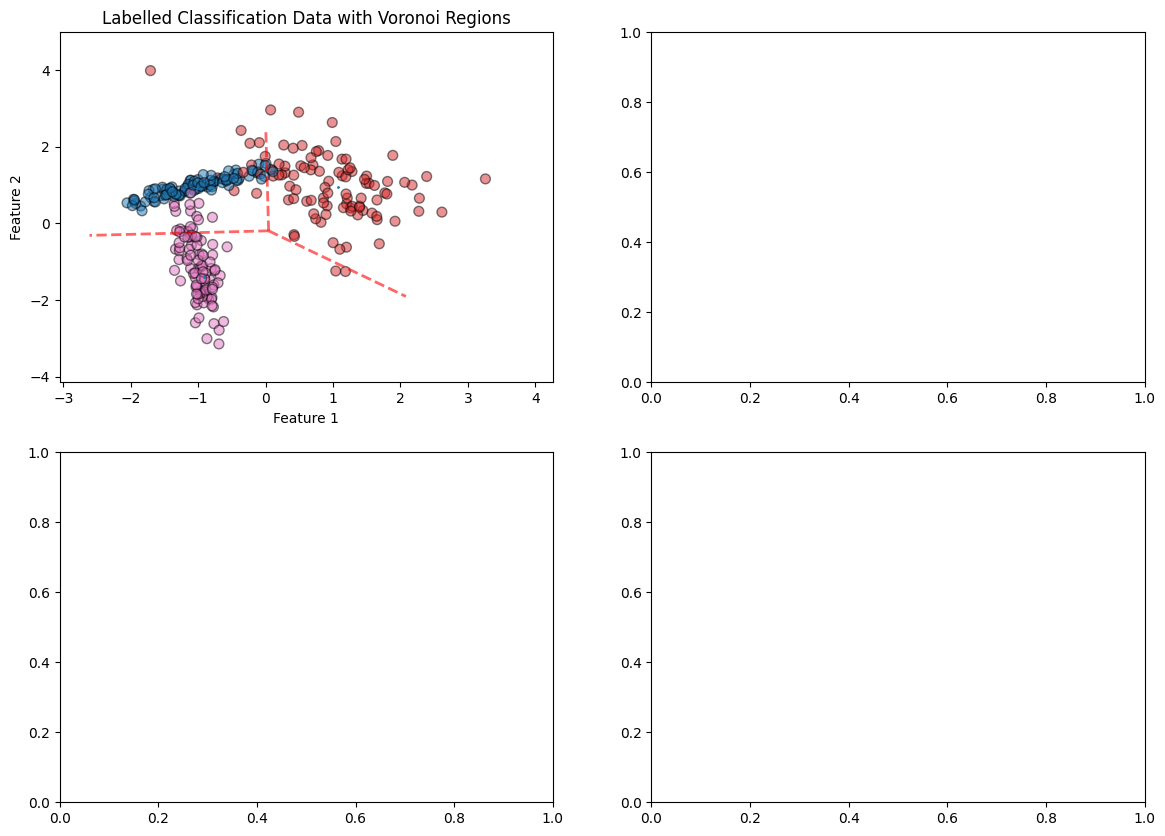

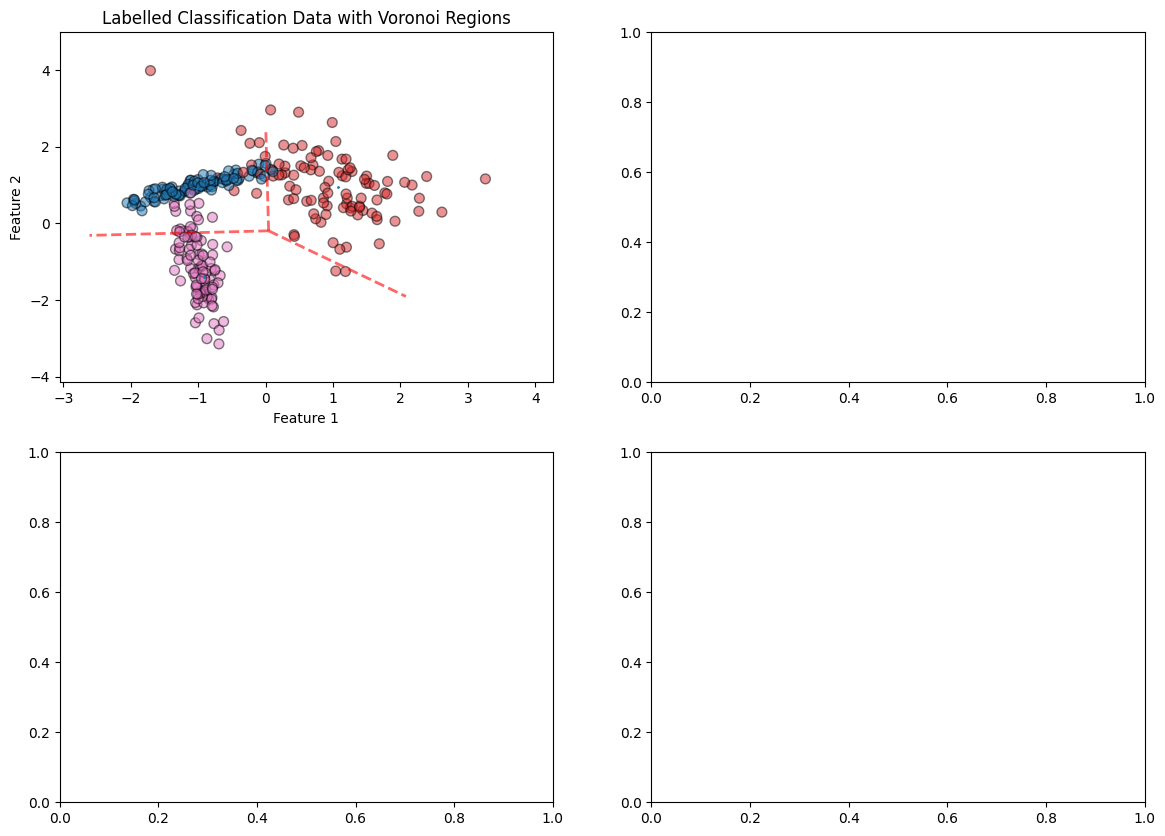

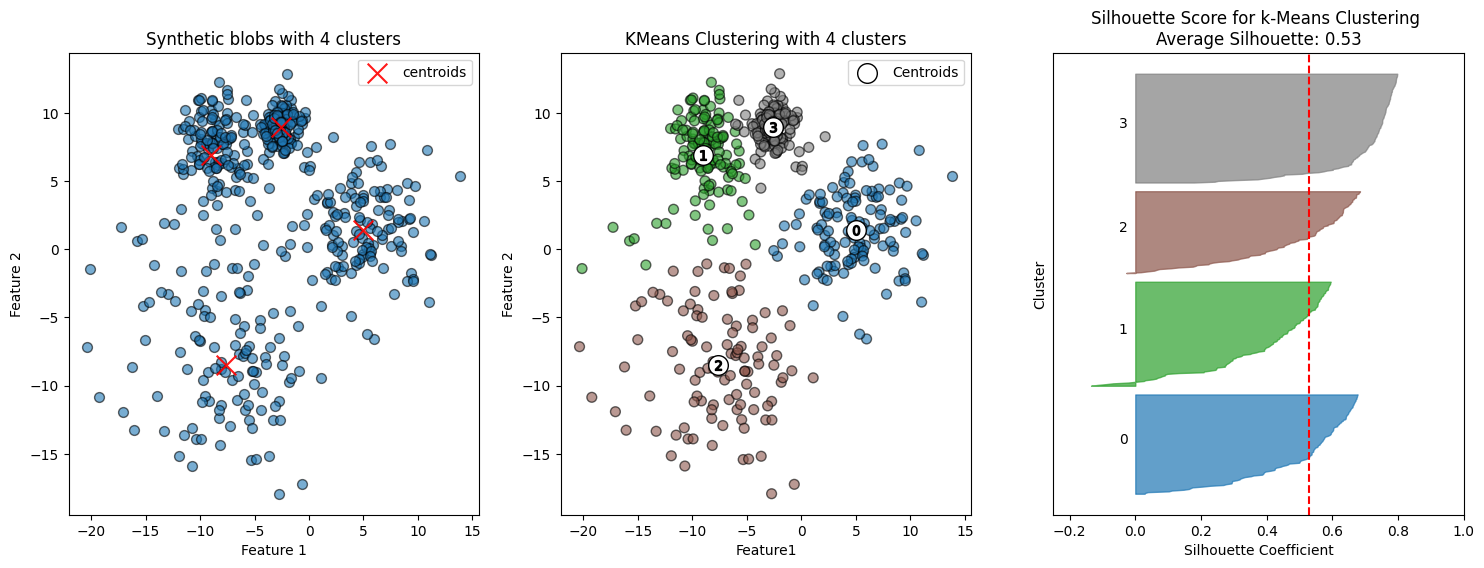

In [75]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = [1.0, 3,5,2], random_state =42)

n_clusters = 4
kmeans = KMeans(n_clusters =n_clusters, random_state = 42)
y_means = kmeans.fit_predict(X)

colormap = cm.tab10

# plot the blobs
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], s = 50, alpha = 0.6, edgecolor = 'k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'r', marker = 'x', s = 200, alpha = 0.9, label= 'centroids')
plt.title(f'Synthetic blobs with {n_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()





colors = colormap(y_means.astype(float)/n_clusters)

plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c = colors, s = 50, alpha = 0.6, edgecolor = 'k')

# label the clusters
centers = kmeans.cluster_centers_
# Draw white circle at cluster centers
plt.scatter(
    centers[:,0],
    centers[:,1],
    marker = "o",
    c = 'white',
    alpha = 1,
    s = 200,
    edgecolor = 'k',
    label = 'Centroids'
    
)

# Label the cluster number
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker = '$%d$'%i, alpha = 1, s = 50, edgecolor = 'k')

plt.title(f'KMeans Clustering with {n_clusters} clusters')
plt.xlabel('Feature1')
plt.ylabel('Feature 2')
plt.legend()


# Evaluate the clustering
plt.subplot(1,3,3)
evaluate_clustering(X, y_means, n_clusters, title_suffix='k-Means Clustering')
plt.show()

In [16]:
centers

array([[ 4.9702268 ,  1.42039633],
       [-9.00848208,  6.9018064 ],
       [-7.61517055, -8.50511565],
       [-2.61664134,  8.9306011 ]])

## Cluster Stability

To assess stablility, we can measure inertia and repeatedly vary the random initialization of cluster centers to observe the impact of having different initial centroid locations.

Inertia measures the compactness of kmeans clustering. It is defined as the sum of squared distances between each data point and its cluster centroid.

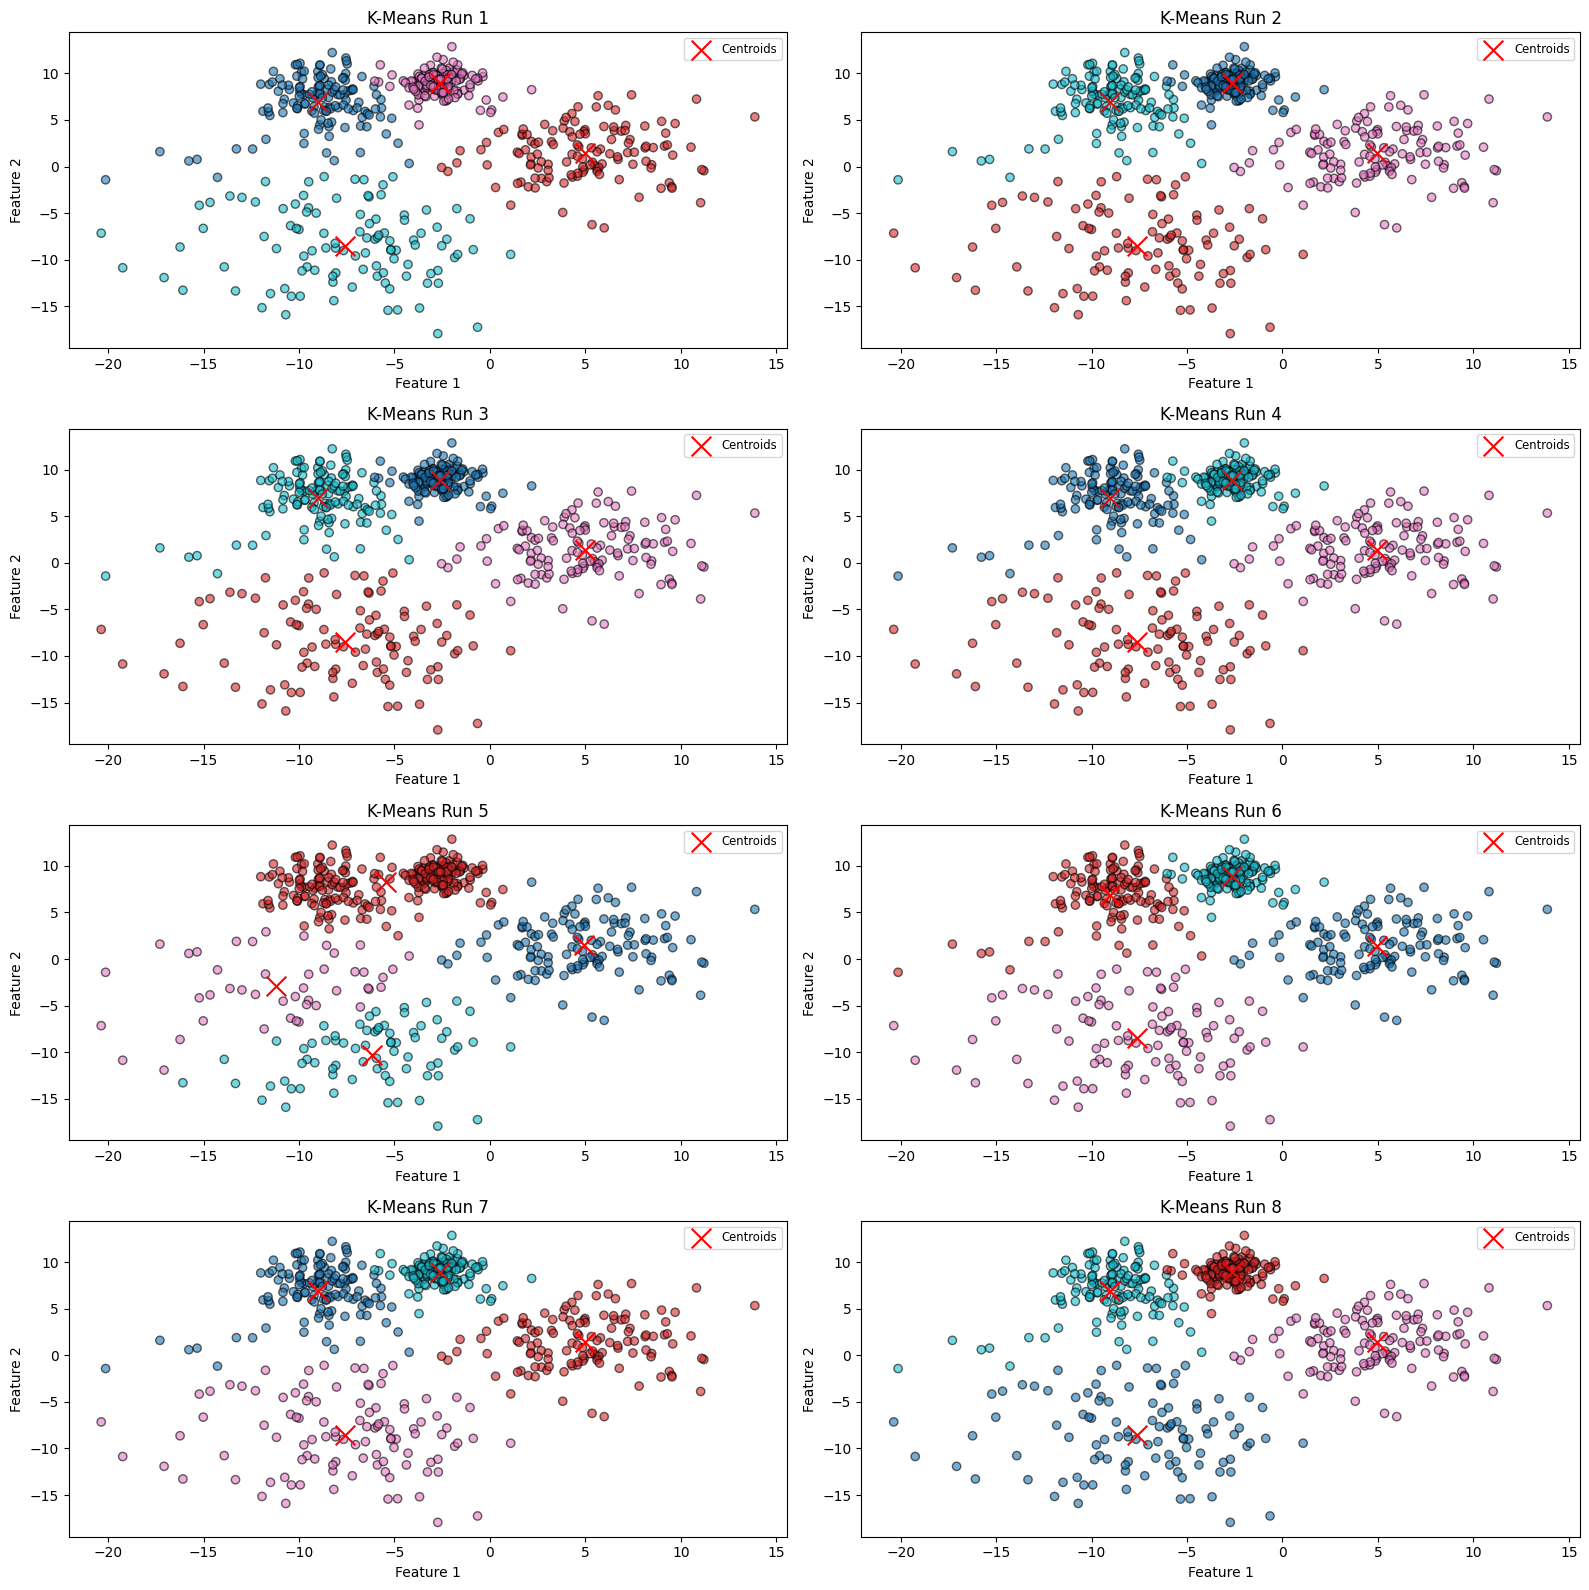

Run 1: Inertia = 7633.51
Run 2: Inertia = 7633.51
Run 3: Inertia = 7633.51
Run 4: Inertia = 7633.51
Run 5: Inertia = 8556.71
Run 6: Inertia = 7633.51
Run 7: Inertia = 7633.51
Run 8: Inertia = 7633.51


In [47]:
n_runs = 8
inertia_values = []
ncols = 2
n_clusters = 4
nrows = - (-n_runs//ncols)
plt.figure(figsize = (16,16))

for i in range(n_runs):
    kmeans = KMeans(n_clusters=4, random_state=None)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

    
    
    plt.subplot(nrows,ncols, i+1)
    plt.scatter(X[:,0], X[:,1], c = kmeans.labels_, cmap = 'tab10', alpha = 0.6, edgecolor = 'k')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red', s = 200, marker = 'x', label = 'Centroids')
    plt.title(f'K-Means Run {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

for i, inertia in enumerate(inertia_values, start = 1):
    print(f"Run {i}: Inertia = {inertia:.2f}")

In [41]:
colormap = cm.tab10
c = colormap(.4)

In [42]:
c

(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)

## Number of Clusters

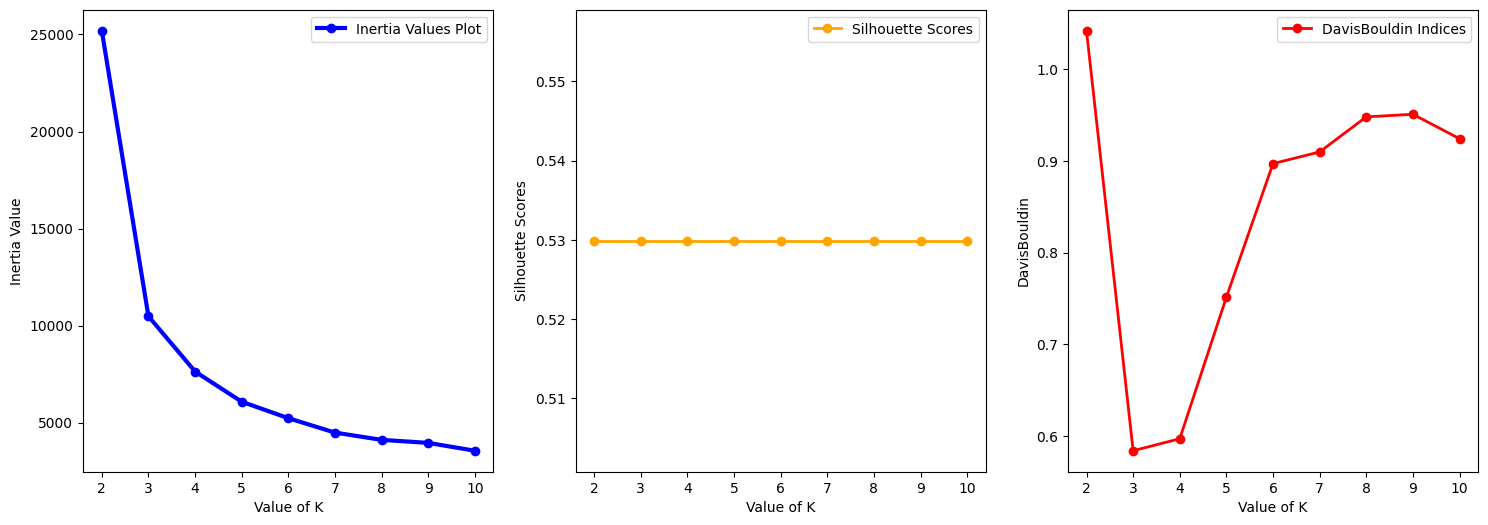

In [60]:
# Range of K values to test
k_values = range(2, 11)

# store the performance metrics
inertia_values = []
silhouette_scores = []
davies_bouldin_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Calculate and store metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X,y_means))
    davies_bouldin_indices.append(davies_bouldin_score(X,y_kmeans))

# plot the inertia values (Elbow method)
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plt.plot(k_values, inertia_values, color = 'blue', lw = 3, marker = 'o',label = 'Inertia Values Plot')
plt.xlabel('Value of K')
plt.ylabel('Inertia Value')
plt.legend()
plt.subplot(1,3,2)
plt.plot(k_values, silhouette_scores, color = 'orange', lw = 2, marker = 'o' ,label = 'Silhouette Scores')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Scores')
plt.legend()

plt.subplot(1,3,3)
plt.plot(k_values, davies_bouldin_indices, color = 'red', lw = 2, label = 'DavisBouldin Indices', marker = 'o')
plt.xlabel('Value of K')
plt.ylabel('DavisBouldin')

plt.legend()
plt.show()

## Limitation of KMeans

In [65]:
from scipy.spatial import Voronoi, voronoi_plot_2d

ith cluster silhouette values shape: (100,)
ith cluster silhouette values shape: (100,)
ith cluster silhouette values shape: (100,)
ith cluster silhouette values shape: (84,)
ith cluster silhouette values shape: (127,)
ith cluster silhouette values shape: (89,)


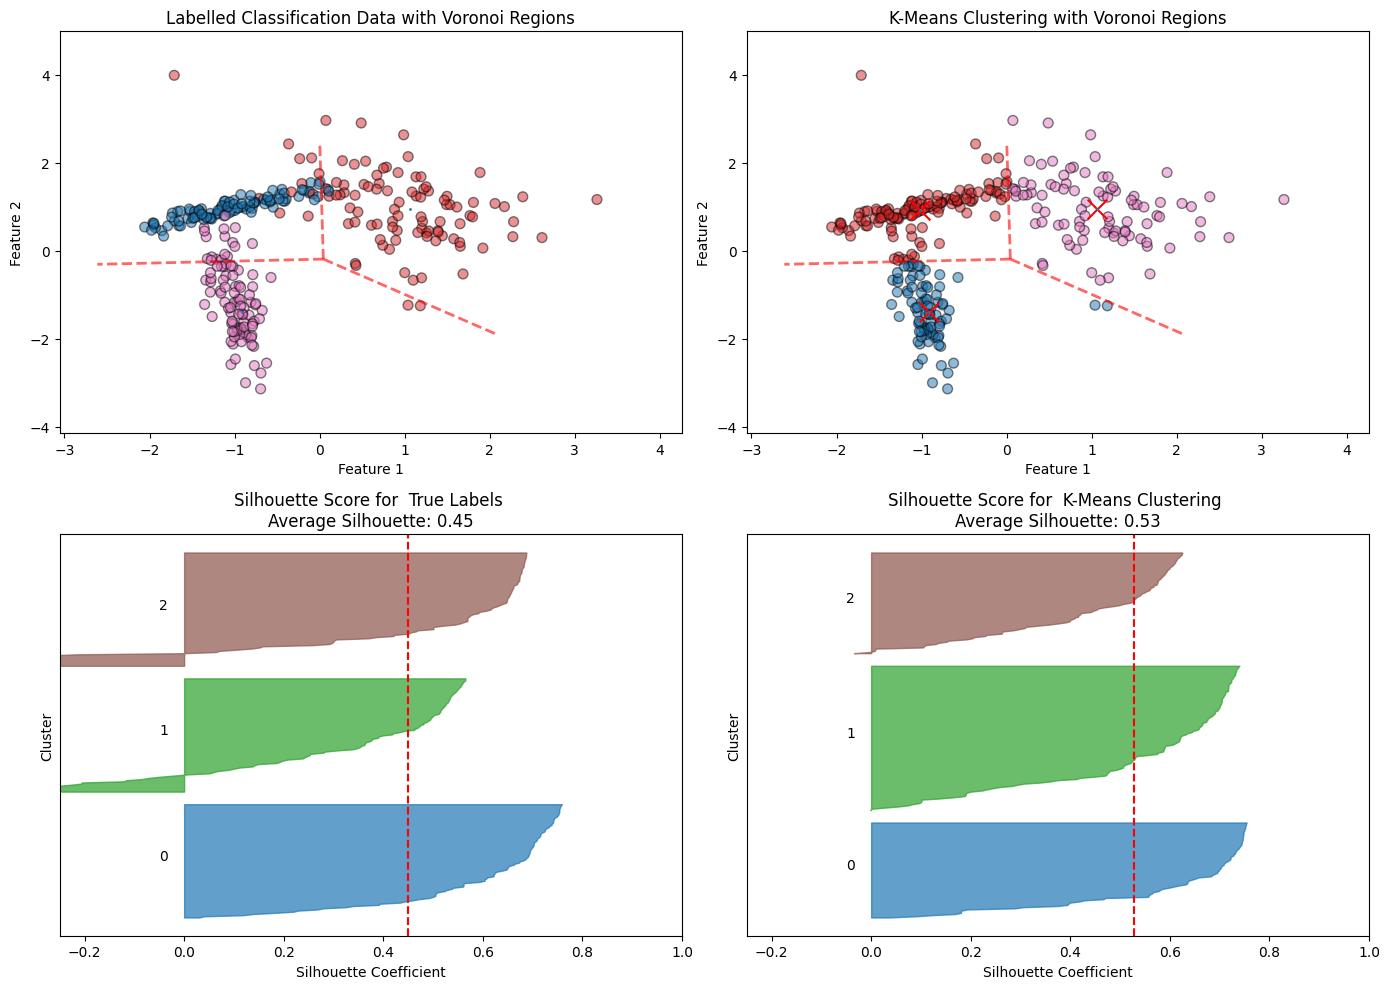

In [81]:
# Generate synthetic classification data
X, y_true = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                                n_clusters_per_class=1, n_classes=3, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compute the Voronoi diagram
vor = Voronoi(centroids)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Get consistent axis limits for all scatter plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot the true labels with Voronoi regions
colormap = cm.tab10
colors_true = colormap(y_true.astype(float) / 3)
axes[0, 0].scatter(X[:, 0], X[:, 1], c=colors_true, s=50, alpha=0.5, ec='k')
voronoi_plot_2d(vor, ax=axes[0, 0], show_vertices=False, line_colors='red', line_width=2, line_alpha=0.6, point_size=2)
axes[0, 0].set_title('Labelled Classification Data with Voronoi Regions')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(y_min, y_max)

# Call evaluate_clustering for true labels
evaluate_clustering(X, y_true, n_cluster=3, ax=axes[1, 0], title_suffix=' True Labels')

# Plot K-Means clustering results with Voronoi regions
colors_kmeans = colormap(y_kmeans.astype(float) / 3)
axes[0, 1].scatter(X[:, 0], X[:, 1], c=colors_kmeans, s=50, alpha=0.5, ec='k')
axes[0, 1].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
voronoi_plot_2d(vor, ax=axes[0, 1], show_vertices=False, line_colors='red', line_width=2, line_alpha=0.6, point_size=2)

axes[0, 1].set_title('K-Means Clustering with Voronoi Regions')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(y_min, y_max)

# Call evaluate_clustering for K-Means labels
evaluate_clustering(X, y_kmeans, n_cluster=3, ax=axes[1, 1], title_suffix=' K-Means Clustering')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [69]:
X.shape

(300, 2)

In [87]:
accuracy = (y_kmeans ==y_true).sum()

In [85]:
y_kmeans

array([2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1,
       1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 2,
       0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1], d

In [86]:
y_true

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2,
       0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0])